In [1]:
!pip install requests

In [2]:
!mkdir -p ~/aiffel/anomaly_detection/kospi

In [4]:
import requests
import os

# 아래 url은 yahoo finance 서버에 우리나라 코스피 데이터를 요청하는 주소입니다.
url = "https://aiffelstaticprd.blob.core.windows.net/media/documents/kospi.csv"

# 데이터를 요청하고 그 결과를 response로 받습니다.
response = requests.get(url)

csv_file = os.getenv('HOME')+'/aiffel/anomaly_detection/kospi/kospi.csv'

# response 의 컨텐츠를 csv로 저장합니다.
with open(csv_file, "w") as fp:  
    fp.write(response.text)

일반적인 다변량 시계열 데이터의 형태를 띄고 있습니다. 컬러명을 통해 주가 데이터라는 점도 알 수 있습니다. 

In [6]:
# 저장한 csv를 읽어옵니다.
import pandas as pd
df = pd.read_csv(csv_file)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,744.979980,760.520020,744.669983,758.030029,758.030029,0.0
1,1997-07-02,763.390015,777.289978,763.390015,777.289978,777.289978,0.0
2,1997-07-03,778.820007,782.169983,773.270020,775.260010,775.260010,0.0
3,1997-07-04,776.020020,783.239990,773.900024,781.700012,781.700012,0.0
4,1997-07-07,777.700012,777.750000,772.140015,773.510010,773.510010,0.0


날짜 데이터를 date time형식으로 캐스팅해줍니다. 그리고 결측치를 확인합니다. <br>

In [8]:
# 날짜데이터를 Datetime 형식으로 바꿔줍니다.
df.loc[:,'Date'] = pd.to_datetime(df.Date)

Date           0
Open         150
High         150
Low          150
Close        150
Adj Close    150
Volume       150
dtype: int64

In [14]:
df.isna().sum()

Date           0
Open         150
High         150
Low          150
Close        150
Adj Close    150
Volume       150
dtype: int64

In [13]:
# 데이터의 정합성을 확인합니다
df.isna().sum()/df.count() * 100

Date         0.000000
Open         2.635278
High         2.635278
Low          2.635278
Close        2.635278
Adj Close    2.635278
Volume       2.635278
dtype: float64

결측치를 확인한 결과 150개 정도 됩니다. 많아보이지만 실제로 전체 데이터에서 차지하는 비중은 3% 미만입니다. 이를 삭제해주겠습니다. 

In [15]:
print("삭제 전 데이터 길이(일자수):",len(df))
df = df.dropna(axis=0).reset_index(drop=True)

print("삭제 후 데이터 길이(일자수):",len(df))
df.isna().sum()

삭제 전 데이터 길이(일자수): 5842
삭제 후 데이터 길이(일자수): 5692


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

데이터가 어떻게 생겼는지 시각화해봅니다.스파이크(Spike)와 딥(Dip)이 발견되는 것을 확인됩니다. 

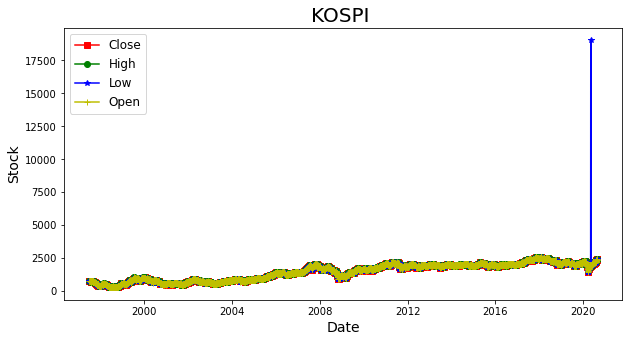

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

plt.rcParams["figure.figsize"] = (10,5)
# Line Graph by matplotlib with wide-form DataFrame

plt.plot(df.Date, df.Close, marker='s', color='r')
plt.plot(df.Date, df.High, marker='o', color='g')
plt.plot(df.Date, df.Low, marker='*', color='b')
plt.plot(df.Date, df.Open, marker='+', color='y')

plt.title('KOSPI ', fontsize=20) 
plt.ylabel('Stock', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['Close', 'High', 'Low', 'Open'], fontsize=12, loc='best')

plt.show()

In [17]:
df.loc[df.Low > df.High]

,Date,Open,High,Low,Close,Adj Close,Volume
5620,2020-05-06,1919.449951,1928.76001,19025.550781,1928.76001,1928.76001,1082200.0
